In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

# Суммарная светимость по сезонам

In [15]:
year = '11'
lum = pd.read_csv(f'../inputs/{year}/lum.dat')

In [17]:
for l in np.round((lum.drop_duplicates().label) * 2e-3, 4):
    print(l, end=' ')

1.05 1.1 1.15 1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 1.65 1.7 1.75 1.8 1.85 1.9 1.925 1.95 1.975 2.0 1.075 1.125 1.175 1.225 1.275 1.325 1.375 1.575 1.525 1.475 1.425 1.625 1.675 1.725 1.775 1.825 1.87 1.89 

In [26]:
print('Year:', year)
print('Integral: ', np.round(lum.lum.sum()*1e-3, 2), 'pb^-1')
print('Num of energy points:', lum.drop_duplicates().shape[0])
print('Min point:', np.round(lum.label.min()*2e-3,2))
print('Min point:', np.round(lum.label.max()*2e-3,2))

Year: 19
Integral:  62.89 pb^-1
Num of energy points: 44
Min point: 1.08
Min point: 1.98


# Отбор по $\cos{\alpha}$ в эксперименте

In [27]:
year = '19'
files = uproot.open(f'../outputs/{year}/trees/550_pics.root')

In [28]:
rawCos = files['pic_align'].pandas.df()

In [29]:
rawCos = rawCos.drop_duplicates()

In [30]:
rawCos.passed.mean()

0.7912502357156327

In [48]:
x = np.array([0.8, 0.8])
y = np.array([3e3, 0])

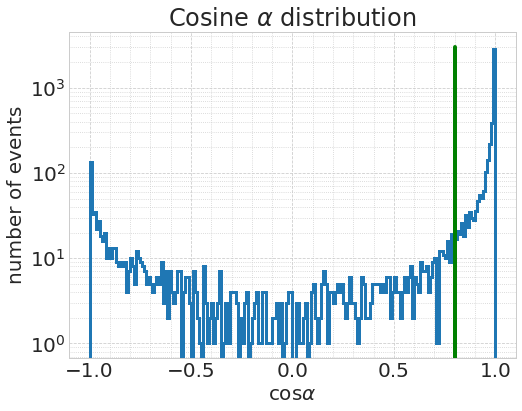

In [50]:
plt.hist(rawCos['align'], bins=200, histtype='step', lw=3);
plt.plot(x, y, lw=4, color='g')
plt.yscale('log');
plt.title('Cosine $\\alpha$ distribution');
plt.xlabel('$\\cos{\\alpha}$');
plt.ylabel('number of events');

plt.grid(linestyle = '--');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');

plt.savefig('cosA.pdf')

# DEDX картинка

In [60]:
files = uproot.open('../outputs/19/trees/550_pics.root')

In [61]:
rawDEDX = files['pic_dedx'].pandas.df()

In [64]:
rawDEDX.head()

,dedx[0],dedx[1],mom[0],mom[1],passed
entry,,,,,
0,2040.932739,2560.859131,30.425514,31.725735,False
1,9925.836914,3376.484619,55.827263,1242.506470,True
2,2340.868896,12037.146484,104.901337,33.010384,False
3,2254.865479,4449.118164,56.942051,70.942253,False
4,2294.244385,1957.272095,1133.864380,1432.325806,True


In [74]:
rawDEDX2 = rawDEDX[(rawDEDX['dedx[0]']<1e5)&(rawDEDX['mom[0]']<1e4)]

AttributeError: 'PathCollection' object has no property 'hue'

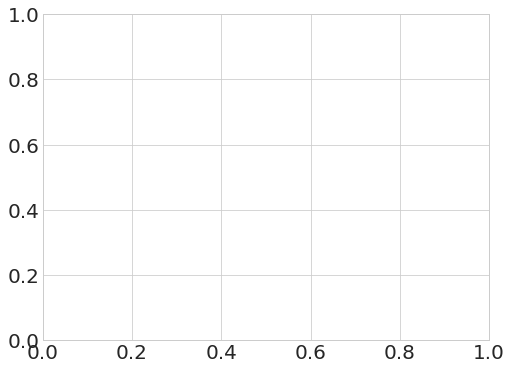

In [76]:
plt.scatter(data=rawDEDX2, x='mom[0]', y='dedx[0]', hue='passed')

# Отбор по импульсу в эксперименте

In [41]:
year = '19'
files = uproot.open(f'../outputs/{year}/trees/550_pics.root')

In [42]:
rawP = files['pic_mom'].pandas.df()

In [43]:
rawP.head()

,momentum,mass,passed
entry,,,
0,46.065910,536.170593,False
1,72.898636,492.930573,False
2,211.933121,532.783691,True
3,24.222395,451.439728,False
4,207.707001,481.165405,False


In [44]:
rawP.passed.mean()

0.2658872336413351

In [45]:
x1 = np.array([211.76, 211.76])
y1 = np.array([60, 0])
x2 = np.array([256.82, 256.82])
y2 = np.array([60, 0])

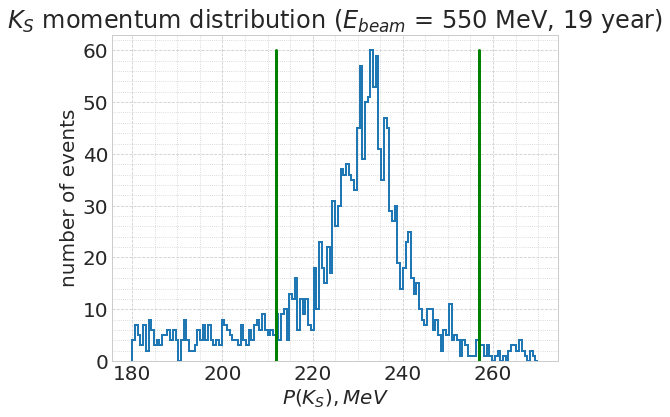

In [52]:
plt.hist(rawP.momentum, bins=150, range=(180, 270), histtype='step', lw=2);

plt.plot(x1, y1, color='g', lw=3)
plt.plot(x2, y2, color='g', lw=3)
plt.title('$K_S$ momentum distribution ($E_{beam}$ = 550 MeV, 19 year)');
plt.xlabel('$P (K_S), MeV$');
plt.ylabel('number of events');

plt.grid(linestyle = '--');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');

# plt.savefig('momD.pdf')

# Эффективность регистрации

In [95]:
rawMCold = pd.read_csv('../outputs/model_old/tables/signal_tablemodel_old.csv')
rawMCnew = pd.read_csv('../outputs/model_new/tables/signal_tablemodel_new.csv')

In [96]:
rawMCold['eff'] = rawMCold.Nsig/rawMCold.lum
rawMCold['effErr'] = rawMCold.dNsig/rawMCold.lum

rawMCnew['eff'] = rawMCnew.Nsig/rawMCnew.lum
rawMCnew['effErr'] = rawMCnew.dNsig/rawMCnew.lum

In [97]:
rawMCold.head()

,name,lum,dEmin,dEmax,Emean,Nsig,dNsig,eff,effErr
0,550.0,7163,0.0,0.0,550.0,1831.24,43.27,0.255653,0.006041
1,562.5,6306,0.0,0.0,562.5,1582.50,40.43,0.250951,0.006411
2,575.0,5516,0.0,0.0,575.0,1387.57,37.83,0.251554,0.006858
3,587.5,5116,0.0,0.0,587.5,1276.30,36.18,0.249472,0.007072
4,600.0,4606,0.0,0.0,600.0,1126.57,34.43,0.244587,0.007475


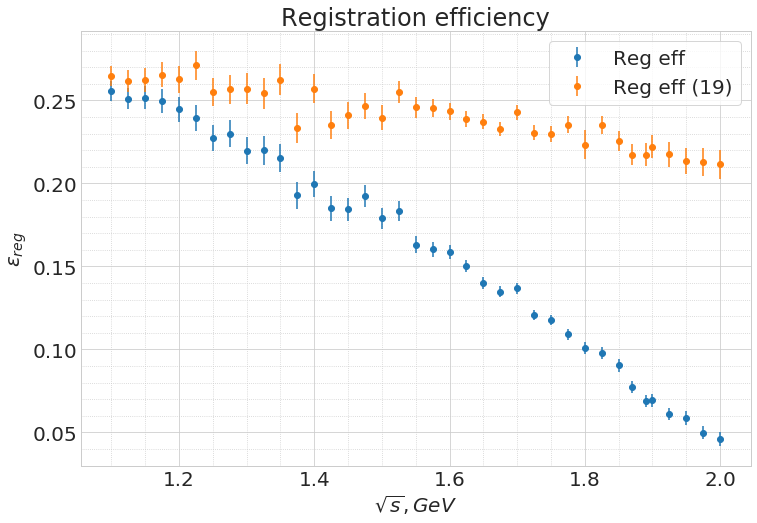

In [201]:
plt.errorbar(x=rawMCold.name*2e-3, y=rawMCold.eff, yerr=rawMCold.effErr, fmt='o', label='Reg eff')
plt.errorbar(x=rawMCnew.name*2e-3, y=rawMCnew.eff, yerr=rawMCnew.effErr, fmt='o', label='Reg eff (19)')
plt.legend(frameon=True);
plt.xlabel('$\sqrt{s}, GeV$');
plt.ylabel('$\\varepsilon_{reg}$');
plt.title('Registration efficiency');

plt.grid(linestyle = '-');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');

# plt.savefig('regeff.pdf')

# Триггеры

In [5]:
rawT = dict()
rawT[11] = pd.read_csv('../outputs/11/tables/triggers11.csv')
rawT[12] = pd.read_csv('../outputs/12/tables/triggers12.csv')
rawT[17] = pd.read_csv('../outputs/17/tables/triggers17.csv')
rawT[19] = pd.read_csv('../outputs/19/tables/triggers19.csv')
for i in rawT:
    rawT[i]['name'] *= 2e-3

In [6]:
rawT[11].head()

,name,TF,CF,TC,eTF,eCF,TrigEff,vTF,vCF,TrigErr
0,1.050,319.0,384.0,154.0,0.2870,0.3263,0.5197,0.0194,0.0215,0.0202
1,1.075,510.0,20.0,393.0,0.9494,0.4354,0.9714,0.0107,0.0165,0.0061
2,1.100,235.0,62.0,103.0,0.6228,0.3059,0.7381,0.0374,0.0250,0.0276
3,1.125,237.0,9.0,170.0,0.9448,0.4181,0.9679,0.0169,0.0244,0.0099
4,1.150,97.0,27.0,45.0,0.6216,0.3194,0.7425,0.0560,0.0387,0.0408


In [8]:
def trigger_plot(data, year, save=False):
    plt.errorbar(data=data, x='name', y='eTF', yerr='vTF', fmt='v', lw=2, ms=0, alpha=0.8, label='TF');
    plt.errorbar(data=data, x='name', y='eCF', yerr='vCF', fmt='v', lw=2, ms=0, alpha=0.8, label='CF');
    plt.errorbar(data=data, x='name', y='TrigEff', yerr='TrigErr', fmt='v', lw=2, ms=8, alpha=0.8, label='both');
    plt.legend(frameon=True);
    plt.xlabel('$\sqrt{s}, GeV$');
    plt.ylabel('$\\varepsilon_{trig}$');
    plt.title(f'Trigger efficiency, {year}');
    plt.grid(True, linestyle = '--');
    ax = plt.gca();
    ax.minorticks_on();
    ax.grid(which='minor', linestyle = ':');
    if save:
        plt.savefig(f'trigEff_{year}.pdf');
    return

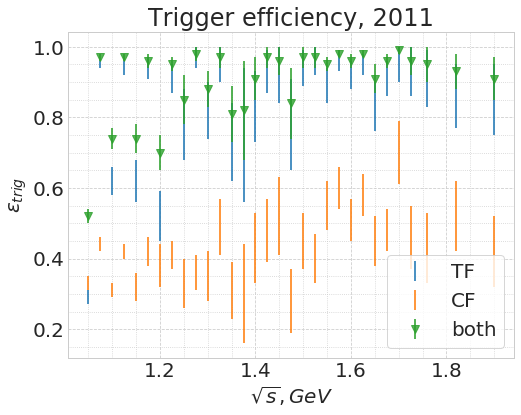

In [9]:
trigger_plot(rawT[11], '2011', save=True)

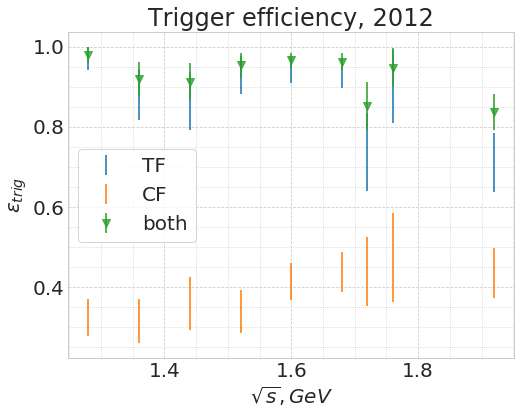

In [10]:
trigger_plot(rawT[12], '2012', save=True)

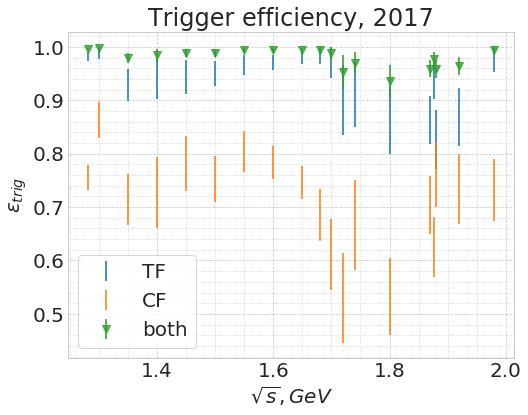

In [11]:
trigger_plot(rawT[17], '2017', save=True)

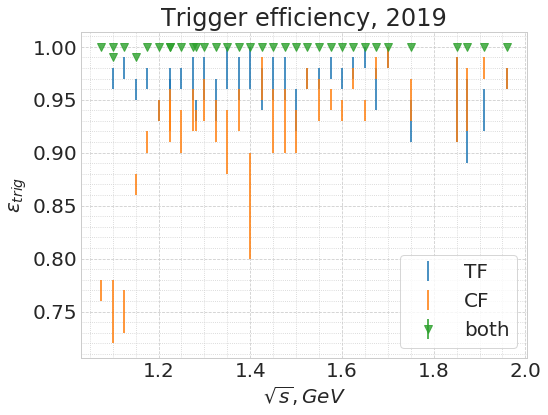

In [18]:
trigger_plot(rawT[19], '2019', save=True)

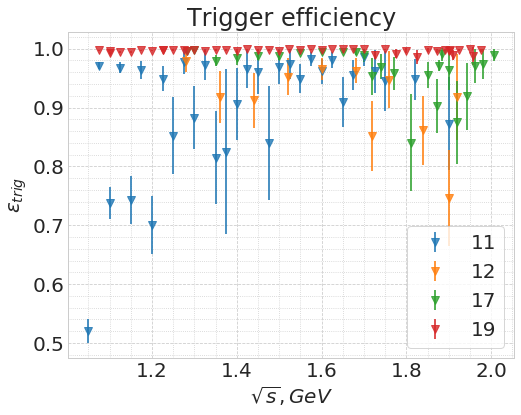

In [9]:
plt.errorbar(data=rawT[11], x='name', y='TrigEff', yerr='TrigErr', fmt='v', lw=2, ms=8, alpha=0.8, label='11');
plt.errorbar(data=rawT[12], x='name', y='TrigEff', yerr='TrigErr', fmt='v', lw=2, ms=8, alpha=0.8, label='12');
plt.errorbar(data=rawT[17], x='name', y='TrigEff', yerr='TrigErr', fmt='v', lw=2, ms=8, alpha=0.8, label='17');
plt.errorbar(data=rawT[19], x='name', y='TrigEff', yerr='TrigErr', fmt='v', lw=2, ms=8, alpha=0.8, label='19');
plt.legend(frameon=True);
plt.xlabel('$\sqrt{s}, GeV$');
plt.ylabel('$\\varepsilon_{trig}$');
plt.title('Trigger efficiency');
plt.grid(True, linestyle = '--');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');
plt.savefig('trigEff_11121719.pdf');

# Рад.поправки

In [188]:
rawRad = pd.read_csv('../outputs/radcors.dat', names=['energy', 'radcor'])

In [189]:
rawRad.head()

,energy,radcor
0,1.050,0.856548
1,1.060,0.852604
2,1.080,0.856702
3,1.100,0.862562
4,1.125,0.870683


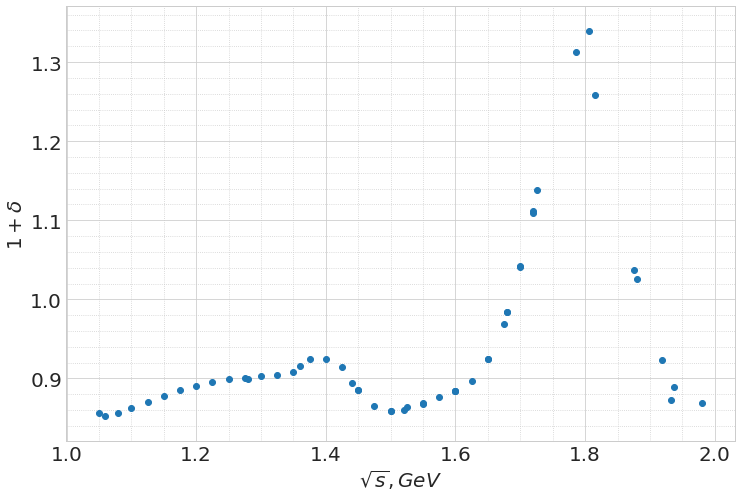

In [199]:
plt.scatter(data=rawRad, x='energy', y='radcor')
plt.xlabel('$\\sqrt{s}, GeV$');
plt.ylabel('$1+\\delta$');
plt.grid(linestyle = '-');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');
# plt.savefig('radcor.pdf')

# Сечения

In [162]:
rawCS = dict()
rawCS[11] = pd.read_csv('../outputs/11/tables/result_visible.csv')

In [164]:
rawCS[11].head()

,name,dEmin,dEmax,Emean,CSvis,dCSvis,TrigEff,TrigErr,RegEff,RegErr,CS,dCS
0,525.0,0.0,0.0,523.58,1.76267,0.06258,0.52,0.02,0.25565,0.00604,13.25918,0.76145
1,537.5,0.0,0.0,537.41,1.63692,0.05487,0.97,0.01,0.25565,0.00604,6.60093,0.27913
2,550.0,0.0,0.0,548.44,0.79807,0.04083,0.74,0.03,0.25565,0.00604,4.21854,0.29286
3,562.5,0.0,0.0,562.13,0.72507,0.03779,0.97,0.01,0.25109,0.00640,2.97700,0.17543
4,575.0,0.0,0.0,575.31,0.32845,0.02672,0.74,0.04,0.25150,0.00686,1.76481,0.17896


# Систематики

In [19]:
cs11 = pd.read_csv('../outputs/11/tables/result_visible.csv')[['name','CS', 'dCS']]
cs11_sys = pd.read_csv('../outputs/11/tables/result_visible_sys.csv')[['name','CS', 'dCS']]

In [20]:
cs11 = cs11.merge( cs11_sys, on='name')
cs11.columns = ['name', 'cs', 'dcs', 'cs_sys', 'dcs_sys']

In [45]:
cs11['diff'] = (cs11.cs_sys - cs11.cs)/cs11.cs
# cs11['diff_err'] = np.sqrt( np.square(cs11.dcs) + np.square(cs11.dcs_sys)  )

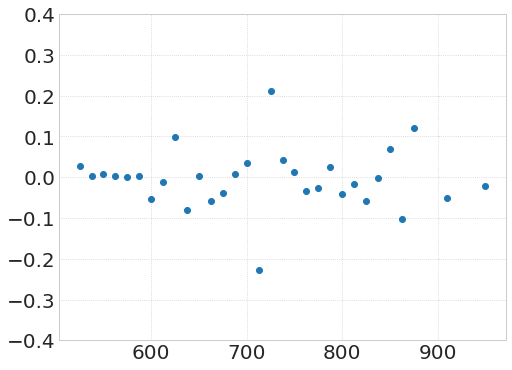

In [46]:
plt.errorbar(data=cs11, x='name', y='diff', fmt='o')#, yerr='diff_err')
plt.ylim([-.4, .4]);
plt.grid(linestyle=':');

In [42]:
cs11

,name,cs,dcs,cs_sys,dcs_sys,diff,diff_err
0,525.0,13.58314,0.79986,13.94811,0.81533,0.026166,1.142164
1,537.5,6.85748,0.29345,6.88622,0.29295,0.004174,0.414648
2,550.0,4.34974,0.30108,4.38576,0.30305,0.008213,0.427187
3,562.5,3.06522,0.18302,3.07445,0.18116,0.003002,0.257518
4,575.0,1.81006,0.18630,1.81097,0.18702,0.000502,0.263978
5,587.5,1.44532,0.12522,1.45074,0.12327,0.003736,0.175714
6,600.0,1.07025,0.13691,1.01421,0.13027,-0.055255,0.188983
7,612.5,1.03970,0.10815,1.02695,0.10534,-0.012415,0.150973
8,625.0,0.56108,0.10069,0.61633,0.11283,0.089644,0.151225
9,637.5,0.72860,0.09321,0.66987,0.09056,-0.087674,0.129959


# Data preparation

In [3]:
year = '19'

In [4]:
files = uproot.pandas.iterate('../outputs/'+year+'/*.root', 't')#, branches=['label', 'be', 'm', 't', 'proc'])
raw = pd.concat([i for i in files])